Import basic libraries 

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [62]:
df = pd.read_csv('C:/Users/leona/Desktop/S7 - ESILV\Python for data analysis/Projet/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [63]:
print('The data shape before cleaning is : ',df.shape)

The data shape before cleaning is :  (2111, 17)


## Data Cleaning

### Number of Null or NaN values of each column of the dataset

In [64]:
for column in df.columns:
    print(column+' : ',df[column].isna().sum()+df[column].isnull().sum())

Gender :  0
Age :  0
Height :  0
Weight :  0
family_history_with_overweight :  0
FAVC :  0
FCVC :  0
NCP :  0
CAEC :  0
SMOKE :  0
CH2O :  0
SCC :  0
FAF :  0
TUE :  0
CALC :  0
MTRANS :  0
NObeyesdad :  0


There are no NaN or Null values in the dataset therefore the data are already ready to be used.

### Proportion of male and female in the dataset

In [65]:
male = len(df.loc[df['Gender'] == 'Male'])
female = len(df.loc[df['Gender'] == 'Female'])

print('Number of males : ',male)
print('Number of females : ',female)

print('\nNumber of peoples : ', female+male)

Number of males :  1068
Number of females :  1043

Number of peoples :  2111


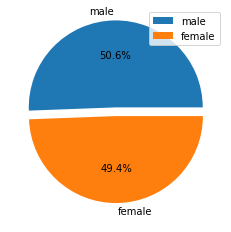

In [66]:
plt.pie([male,female],labels=['male','female'],autopct='%1.1f%%',explode=[0.1,0])
plt.legend()
plt.show()

In [73]:
df_FCVC=df[["FCVC"]]
df_CH2O = df[["CH2O"]]
df_FAF = df[["FAF"]]
df_TUE = df[["TUE"]]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


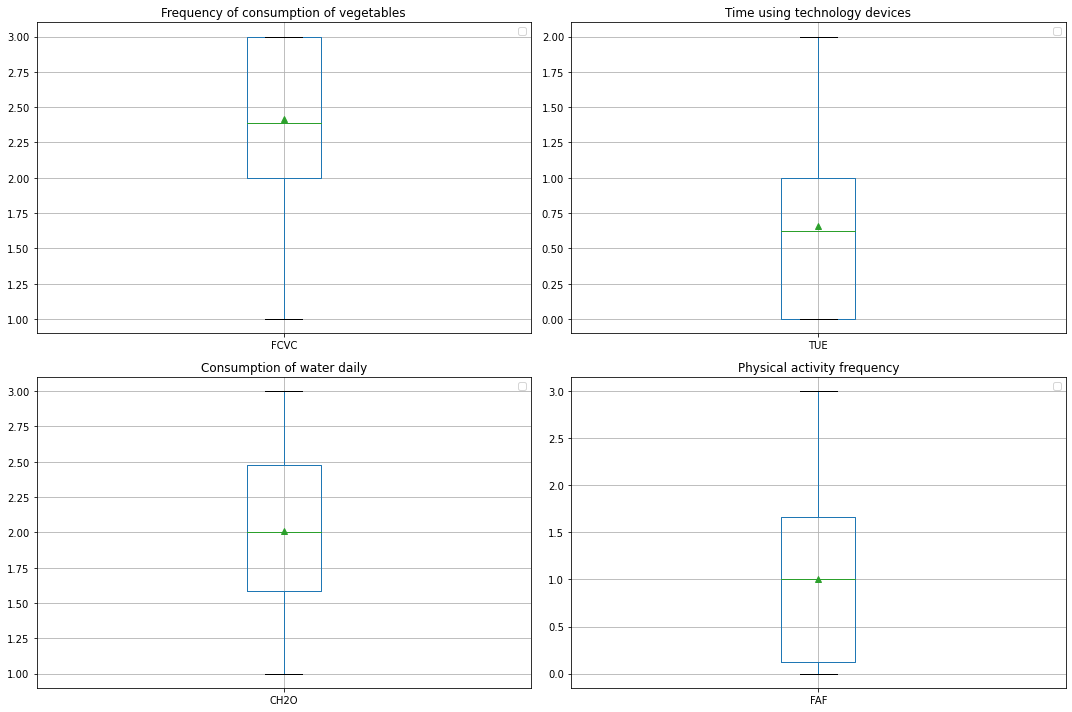

In [76]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

df_FCVC.boxplot(showmeans=True,ax=ax[0][0])
ax[0][0].set_title('Frequency of consumption of vegetables')

df_TUE.boxplot(showmeans=True,ax=ax[0][1])
ax[0][1].set_title('Time using technology devices')

df_CH2O.boxplot(showmeans=True,ax=ax[1][0])
ax[1][0].set_title("Consumption of water daily")

df_FAF.boxplot(showmeans=True,ax=ax[1][1])
ax[1][1].set_title('Physical activity frequency')


ax[0][0].legend() 
ax[0][1].legend() 
ax[1][0].legend() 
ax[1][1].legend() 

plt.tight_layout()

Text(0.5, 1.0, 'Number of main meals')

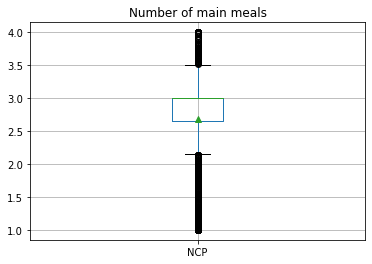

In [79]:
df_NCP = df[["NCP"]]
df_NCP.boxplot(showmeans=True)
plt.title('Number of main meals')


### Proportion of smoker and non smoker in the dataset 

In [7]:
smoker = len(df.loc[df['SMOKE'] == 'yes'])
nonsmoker = len(df.loc[df['SMOKE'] == 'no'])

print('Number smokers : ',smoker)
print('Number non smokers : ',nonsmoker)

print('\nNumber of peoples : ', nonsmoker+smoker)

Number smokers :  44
Number non smokers :  2067

Number of peoples :  2111


### Proportion of people with a family history with overweight in the dataset 

In [8]:
family_history_with_overweight = len(df.loc[df['family_history_with_overweight'] == 'yes'])
family_history_without_overweight = len(df.loc[df['family_history_with_overweight'] == 'no'])

print('Number of people with family history with overweight : ',family_history_with_overweight)
print('Number of people with family history without overweight : ',family_history_without_overweight)

print('\nNumber of peoples : ', family_history_without_overweight+family_history_with_overweight)

Number of people with family history with overweight :  1726
Number of people with family history without overweight :  385

Number of peoples :  2111


### Proportion of people with calorie’s consumption monitoring in the dataset

In [9]:
SCC_yes = len(df.loc[df['SCC'] == 'yes'])
SCC_no = len(df.loc[df['SCC'] == 'no'])

print('Number of people with a SCC : ',SCC_yes)
print('Number of people without a SCC : ',SCC_no)

print('\nNumber of peoples : ', SCC_no+SCC_yes)

Number of people with a SCC :  96
Number of people without a SCC :  2015

Number of peoples :  2111


### Proportion of people with frequent consumption of high caloric food in the dataset

In [10]:
FAVC_yes = len(df.loc[df['FAVC'] == 'yes'])
FAVC_no = len(df.loc[df['FAVC'] == 'no'])

print('Number of people with a FAVC : ',FAVC_yes)
print('Number of people without a FAVC : ',FAVC_no)

print('\nNumber of peoples : ', FAVC_no+FAVC_yes)

Number of people with a FAVC :  1866
Number of people without a FAVC :  245

Number of peoples :  2111


### Summary of the proportion of the 4 yes or no variables (via pieplots)

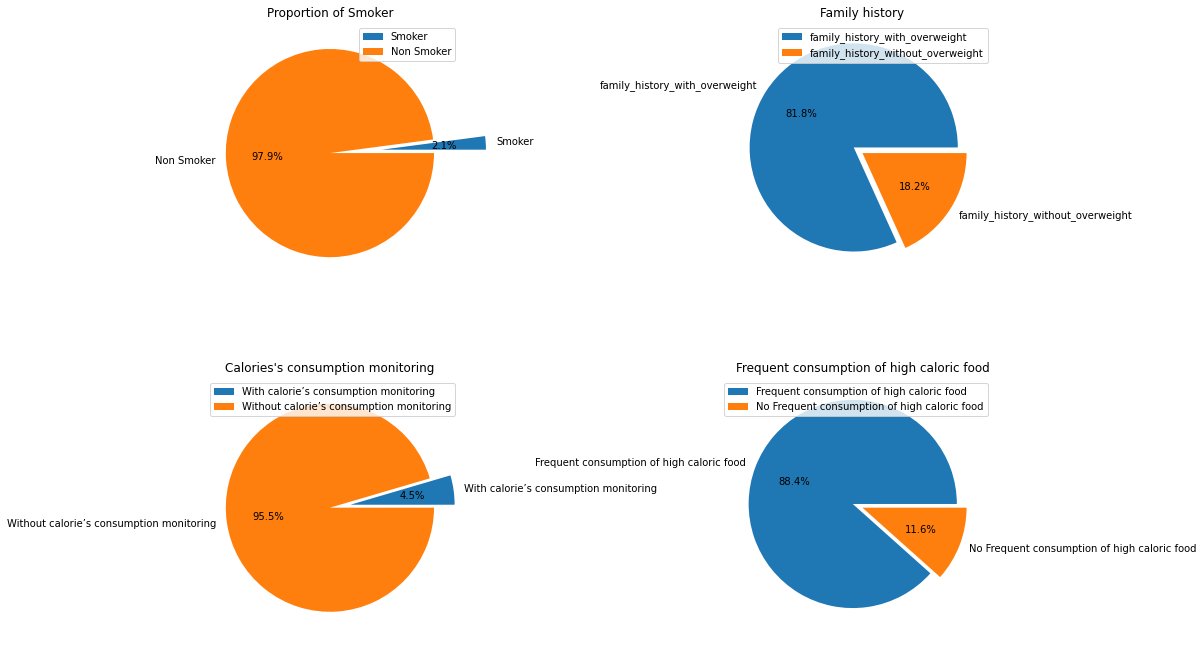

In [11]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].pie([smoker,nonsmoker],labels=['Smoker','Non Smoker'], autopct='%1.1f%%',explode=[0.5,0])
ax[0][0].set_title('Proportion of Smoker')

ax[0][1].pie([family_history_with_overweight,family_history_without_overweight],
    labels=['family_history_with_overweight','family_history_without_overweight'], 
    autopct='%1.1f%%',explode=[0.1,0])
ax[0][1].set_title('Family history')

ax[1][0].pie([SCC_yes,SCC_no],
    labels=['With calorie’s consumption monitoring','Without calorie’s consumption monitoring'],
    autopct='%1.1f%%',explode=[0.2,0])
ax[1][0].set_title("Calories's consumption monitoring")

ax[1][1].pie([FAVC_yes,FAVC_no],
    labels=['Frequent consumption of high caloric food','No Frequent consumption of high caloric food'], 
    autopct='%1.1f%%',explode=[0.1,0])
ax[1][1].set_title('Frequent consumption of high caloric food')


ax[0][0].legend() 
ax[0][1].legend() 
ax[1][0].legend() 
ax[1][1].legend() 

plt.tight_layout()

### Proportion of the different transport used by our dataset

In [12]:
Automobile = len(df.loc[df['MTRANS'] == 'Automobile'])
Motorbike = len(df.loc[df['MTRANS'] == 'Motorbike'])
Bike = len(df.loc[df['MTRANS'] == 'Bike'])
Public_Transportation  = len(df.loc[df['MTRANS'] == 'Public_Transportation'])
Walking = len(df.loc[df['MTRANS'] == 'Walking'])

print('Number Automobile : ', Automobile)
print('Number Motorbike : ',Motorbike)
print('Number Bike : ', Bike)
print('Number Public_Transportation : ',Public_Transportation)
print('Number Walking : ',Walking)

print('\nNumber of peoples : ', Automobile+Motorbike+Bike+Public_Transportation+Walking)

Number Automobile :  457
Number Motorbike :  11
Number Bike :  7
Number Public_Transportation :  1580
Number Walking :  56

Number of peoples :  2111


### Proportion of consumption of food between meals by our dataset

In [13]:
CAEC_no = len(df.loc[df['CAEC'] == 'no'])
CAEC_Sometimes = len(df.loc[df['CAEC'] == 'Sometimes'])
CAEC_Frequently = len(df.loc[df['CAEC'] == 'Frequently'])
CAEC_Always = len(df.loc[df['CAEC'] == 'Always'])

print('Number of no : ', CAEC_no)
print('Number of Sometimes : ', CAEC_Sometimes)
print('Number of Frequently : ', CAEC_Frequently)
print('Number of Always : ',CAEC_Always)

print('\nNumber of peoples : ', CAEC_no+CAEC_Sometimes+CAEC_Frequently+CAEC_Always)

Number of no :  51
Number of Sometimes :  1765
Number of Frequently :  242
Number of Always :  53

Number of peoples :  2111


### Proportion of consumption of alcohol by our dataset

In [14]:
CALC_no = len(df.loc[df['CALC'] == 'no'])
CALC_Sometimes = len(df.loc[df['CALC'] == 'Sometimes'])
CALC_Frequently = len(df.loc[df['CALC'] == 'Frequently'])
CALC_Always = len(df.loc[df['CALC'] == 'Always'])

print('Number of no : ', CALC_no)
print('Number of Sometimes : ', CALC_Sometimes)
print('Number of Frequently : ', CALC_Frequently)
print('Number of Always : ',CALC_Always)

print('\nNumber of peoples : ', CALC_no+CALC_Sometimes+CALC_Frequently+CALC_Always)

Number of no :  639
Number of Sometimes :  1401
Number of Frequently :  70
Number of Always :  1

Number of peoples :  2111


### Proportion of the target variable of our dataset

In [15]:
Insufficient_Weight = len(df.loc[df['NObeyesdad'] == 'Insufficient_Weight'])
Normal_Weight = len(df.loc[df['NObeyesdad'] == 'Normal_Weight'])
Overweight_Level_I = len(df.loc[df['NObeyesdad'] == 'Overweight_Level_I'])
Overweight_Level_II  = len(df.loc[df['NObeyesdad'] == 'Overweight_Level_II'])
Obesity_Type_I = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_I'])
Obesity_Type_II = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_II'])
Obesity_Type_III = len(df.loc[df['NObeyesdad'] == 'Obesity_Type_III'])

print('Number of people with Insufficient Weight : ',Insufficient_Weight)
print('Number of people with Normal Weight : ',Normal_Weight)
print('Number of people with Overweight_Level_I : ', Overweight_Level_I)
print('Number of people with Overweight_Level_II : ',Overweight_Level_II)
print('Number of people with Obesity_Type_I : ',Obesity_Type_I)
print('Number of people with Obesity_Type_II : ',Obesity_Type_II)
print('Number of people with Obesity_Type_III : ',Obesity_Type_III)

print('\nNumber of peoples : ', Insufficient_Weight+Normal_Weight+ Overweight_Level_I+Overweight_Level_II+Obesity_Type_I+Obesity_Type_II+Obesity_Type_III)

Number of people with Insufficient Weight :  272
Number of people with Normal Weight :  287
Number of people with Overweight_Level_I :  290
Number of people with Overweight_Level_II :  290
Number of people with Obesity_Type_I :  351
Number of people with Obesity_Type_II :  297
Number of people with Obesity_Type_III :  324

Number of peoples :  2111


### Summary of the different variables of the dataset (via barplot)

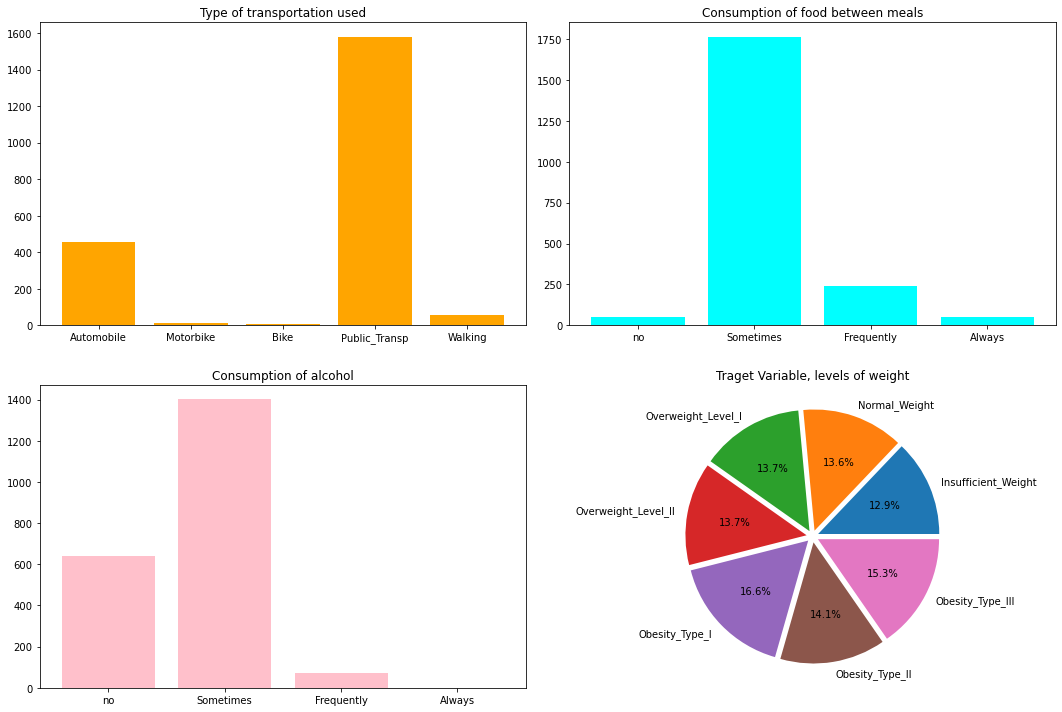

In [16]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0][0].bar(['Automobile','Motorbike','Bike','Public_Transp','Walking'],
    [Automobile,Motorbike,Bike,Public_Transportation,Walking],
    color = 'orange')
ax[0][0].set_title('Type of transportation used')

ax[0][1].bar(['no','Sometimes','Frequently','Always'],
    [CAEC_no,CAEC_Sometimes,CAEC_Frequently,CAEC_Always], 
    color = 'cyan')
ax[0][1].set_title('Consumption of food between meals')

ax[1][0].bar(['no','Sometimes','Frequently','Always'],
    [CALC_no,CALC_Sometimes,CALC_Frequently,CALC_Always], 
    color = 'pink')
ax[1][0].set_title("\nConsumption of alcohol")

ax[1][1].pie([Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III],
    labels=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],
    autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05])
ax[1][1].set_title('\nTraget Variable, levels of weight')

plt.tight_layout()

We can see that there are 2111 values, the shape of the dataset is respected

## Data Presentation

In [17]:
print('The data shape after cleaning is : ',df.shape)

The data shape after cleaning is :  (2111, 17)


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [19]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

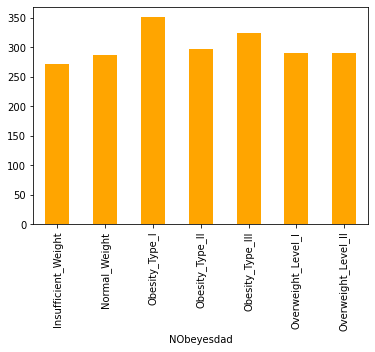

In [20]:
ax = df.groupby(['NObeyesdad']).size().plot(kind='bar',color ='orange')

In [21]:
print(df.groupby(['NObeyesdad']).size())

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
dtype: int64


# Data Analysis 

### Obesity level according to age, weight and height

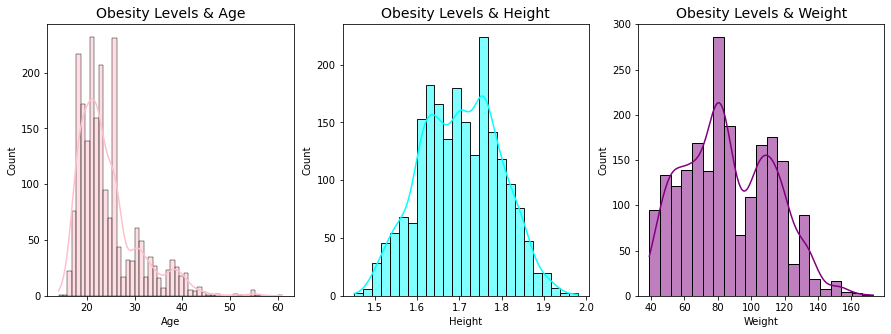

In [22]:
fig, ax = plt.subplots(1, 3 ,figsize =(15,5))

sns.histplot(df['Age'], ax = ax[0] , color = 'pink', kde=True)
ax[0].set_title('Obesity Levels & Age', fontsize = 14)

sns.histplot(df['Height'], ax = ax[1] , color = 'cyan', kde=True)
ax[1].set_title('Obesity Levels & Height' , fontsize = 14)

sns.histplot(df['Weight'], ax = ax[2] , color = 'purple', kde=True)
ax[2].set_title('Obesity Levels & Weight' , fontsize = 14)

plt.show()

We can see that the level of Obesity is higher by younger people around 20 and 25 years old.

We can see that the Obesity level is extremly high when the Weight of the person in around 80Lb.  

### Attributes related with eating habits and their impact on weight

* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables (FCVC) 
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Consumption of alcohol (CALC)

### Attributes related with physical condition and their impact on weight

* Calorie’s consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Transportation used (MTRANS)

_________________________________________________________________________________________________________________________________________________________

### Correlation Matrix

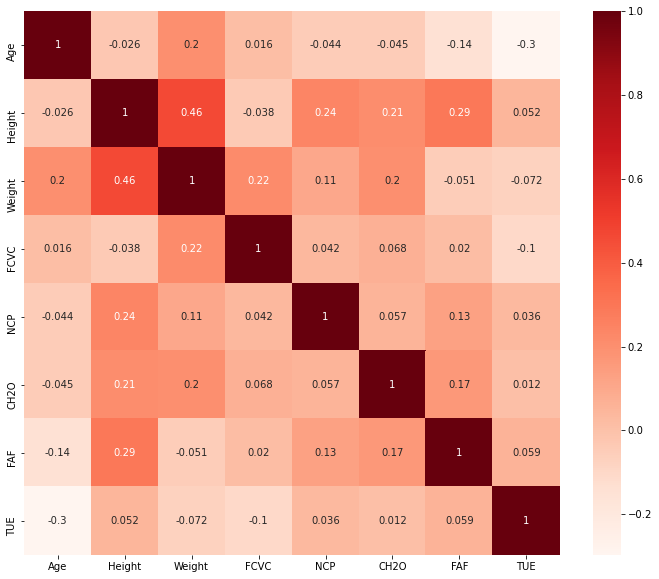

In [23]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

______________________________________________________________________________________________________________________________________________________________________________________________________________

# Classification of the type of Obesity

### First step : turn the qualitative data into quantitative data

Gender 
* male = 0
* female = 1

In [24]:
df.Gender.replace(('Male','Female'),(1,2), inplace = True)

Family_history_with_overweight

FCHCF (Frequent consumption of high caloric food)

SMOKE

SCC (Calorie’s consumption monitoring)

- yes = 1
- no = 0

In [25]:
df.family_history_with_overweight.replace(('yes','no'),(1,0), inplace = True)
df.FAVC.replace(('yes','no'),(1,0), inplace = True)
df.SMOKE.replace(('yes','no'),(1,0), inplace = True)
df.SCC.replace(('yes','no'),(1,0), inplace = True)

CAEC (Consumption of food between meals)

CALC (Consumption of alcohol)
* no = 0
* Sometimes = 1
* Frequently = 2
* Always = 3

In [26]:
df.CAEC.replace(('no','Sometimes','Frequently','Always'),(0,1,2,3), inplace = True)
df.CALC.replace(('no','Sometimes','Frequently','Always'),(0,1,2,3), inplace = True)

MTRANS (Transportation used)
* Automobile = 0
* Motorbike = 1
* Bike = 2
* Public_Transportation = 3
* Walking = 4

In [27]:
df.MTRANS.replace(('Automobile','Motorbike','Bike','Public_Transportation','Walking'),(0,1,2,3,4), inplace = True)

NObeyesdad (target variable) 
* Insufficient Weight = 0
* Normal Weight = 1
* Overweight level I = 2
* Overweight level II = 3
* Obesity Type I = 4 
* Obesity type II = 5
* Obesity Type III = 6.


In [28]:
df.NObeyesdad.replace(('Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'),(0,1,2,3,4,5,6), inplace = True)

In [29]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,2,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,3,1
1,2,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,4,2
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,3,3


### Second step : Split the data into a training set and a test set

In [30]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [31]:
Y=df["NObeyesdad"]
X=df.loc[:,df.columns!="NObeyesdad"]
print(X.head())

#avant de séparer on mélange avec random_state

X_train, X_test,Y_train,Y_test=train_test_split(X, Y, test_size= 0.33,random_state=4)

print( '\ntrain set', X_train.shape,'test set', X_test.shape)
print( '\ntrain set', Y_train.shape,'test set', Y_test.shape)

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       2  21.0    1.62    64.0                               1     0   2.0   
1       2  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0  3.0     1      0   2.0    0  0.0  1.0     0       3  
1  3.0     1      1   3.0    1  3.0  0.0     1       3  
2  3.0     1      0   2.0    0  2.0  1.0     2       3  
3  3.0     1      0   2.0    0  2.0  0.0     2       4  
4  1.0     1      0   2.0    0  0.0  0.0     1       3  

train set (1414, 16) test set (697, 16)

train set (1414,) test set (697,)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


### Third step : Test the different classifier : K-neighbors and SVC

In [33]:
model_k=KNeighborsClassifier()
model_k.fit(X_train,Y_train)

print("train score: ",model_k.score(X_train,Y_train))
print("test score: ",model_k.score(X_test,Y_test))

train score:  0.864922206506365
test score:  0.812051649928264


In [34]:
model_svc=SVC()
model_svc.fit(X_train,Y_train)

print("train score: ",model_svc.score(X_train,Y_train))
print("test score: ",model_svc.score(X_test,Y_test))

train score:  0.9384724186704385
test score:  0.8723098995695839
